In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df = df.replace(to_replace ='0?', 
                 value ='0')

In [4]:
def check_null_values(df):
    if df.isnull().any().any():
        print(df.isnull().any())
    else:
        print('No null values present in Dataset')

In [5]:
check_null_values(df)

No null values present in Dataset


In [6]:
# Create correlation matrix
corr_matrix = df._get_numeric_data().corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.70
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

print('Dropping following columns due to high correlation')
print(to_drop)

Dropping following columns due to high correlation
['Non-Cash Items', 'Change in Working Capital', '(Increase) Decrease in Accounts Receivable', '(Increase) Decrease in Inventories', 'Increase (Decrease) in Other', 'Cash from Operating Activities', 'Change in Fixed Assets & Intangibles', 'Acquisition of Fixed Assets & Intangibles', 'Other Investing Activities', 'Dividends Paid', 'Repayments of Long Term Debt', 'Cash From (Repurchase of) Equity', 'Decrease in Capital Stock', 'Cash from Financing Activities', 'Net Cash Before Disc. Operations and FX', 'Net Cash Before FX', 'Net Changes in Cash', 'Revenue', 'Cost of revenue', 'Cost of Goods & Services', 'Gross Profit', 'Operating Expenses', 'Selling, General & Administrative', 'Operating Income (Loss)', 'Pretax Income (Loss), Adjusted', 'Abnormal Gains (Losses)', 'Pretax Income (Loss)', 'Income Tax (Expense) Benefit, net', 'Income (Loss) from Continuing Operations', 'Income (Loss) Including Minority Interest', 'Net Income', 'Net Income Av

In [7]:
to_drop.remove('Revenue(Y)')
to_drop.remove('Income(Y)')

In [8]:
df = df.drop(to_drop, axis =1)

In [9]:
X_train, y_train = df.drop(columns=['Revenue(Y)', 'Income(Y)']).iloc[:30], df['Revenue(Y)'].iloc[:30]
X_test, y_test = df.drop(columns=['Revenue(Y)', 'Income(Y)' ]).iloc[30:36],  df['Revenue(Y)'].iloc[30:36]

In [10]:
from sklearn.linear_model import Lasso
regr = Lasso(alpha=0.1)

regr.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [11]:
y_pred = regr.predict(X_test)

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
pd.options.display.max_rows = 999

In [13]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000

In [14]:
columns=list(df.drop(columns=['Revenue(Y)', 'Income(Y)']).columns)

In [15]:
import numpy as np

In [16]:
X=None
y = []

In [17]:
for i in range(len(df.index)-24):
        
        if df['Revenue(Y)'].iloc[-1-i] > 0:
            temp = df[columns].iloc[-1].values
            temp = np.append(df[columns].iloc[-2-i].values, temp)
            temp = np.append(df[columns].iloc[-3-i].values, temp)
            temp = np.append(df[columns].iloc[-4-i].values, temp)
            temp = np.append(df[columns].iloc[-6-i].values, temp)
            temp = np.append(df[columns].iloc[-8-i].values, temp)
            temp = np.append(df[columns].iloc[-10-i].values, temp)
            temp = np.append(df[columns].iloc[-12-i].values, temp)
            temp = np.append(df[columns].iloc[-14-i].values, temp)
            temp = np.append(df[columns].iloc[-16-i].values, temp)
            if X is None:
                X = temp
            else:
                X = np.vstack((temp, X))
            y.append(df['Revenue(Y)'].iloc[-1-i])
#             print(df[columns].iloc[-1-i], df['Revenue(Y)'].iloc[-1-i])

In [18]:
def linear_regression(X_train, y_train, X_test, y_test):
#     regr = linear_model.LinearRegression()
#     regr = linear_model.Lasso(alpha=0.1)
#     regr = linear_model.Ridge(alpha=.5)
    regr = linear_model.ElasticNet(random_state=0)
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    # Make predictions using the testing set
    y_pred = regr.predict(X_test)
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
          % mean_squared_error(y_test, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
    plt.scatter(y_test, y_pred, color='black')
    plt.plot(y_test, y_test, color='blue', linewidth=3)
    plt.xlabel('Y(actual)')
    plt.ylabel('Y(Predicted)')
    plt.show()
    
    return regr, y_pred

Coefficients: 
 [ 0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000

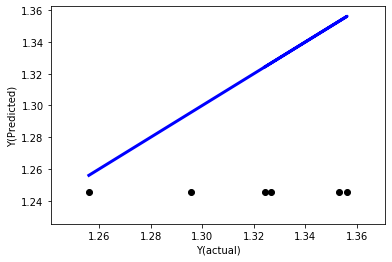

(ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
       max_iter=1000, normalize=False, positive=False, precompute=False,
       random_state=0, selection='cyclic', tol=0.0001, warm_start=False),
 array([1.24539789, 1.24539665, 1.24540331, 1.24540556, 1.24540521,
        1.24546856]))

In [19]:
linear_regression(X_train, y_train, X_test, y_test)


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.nan_to_num(X), np.nan_to_num(y), test_size=0.33, random_state=42)

In [33]:
# XGB Classifier
from xgboost import XGBClassifier

classifier = XGBClassifier( learning_rate =0.1,
 n_estimators=120,
 max_depth=4,
 num_class = 9,
 min_child_weight=10,
 gamma=1.5,
 subsample=0.8,
 colsample_bytree=0.6,
 objective= 'multi:softmax',
 nthread=4,
#  scale_pos_weight=19,
 reg_lambda=5,
max_delta_step=1,
 alpha=0,
 base_score=0.5,
 seed=1029)

In [34]:
classifier.fit(X_train, y_train)

# Best hyperparameters:
# {'subsample': 0.8, 'min_child_weight': 10, 'max_depth': 4, 'gamma': 1.5, 'colsample_bytree': 0.6}

XGBClassifier(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=1.5, learning_rate=0.1,
       max_delta_step=1, max_depth=4, min_child_weight=10, missing=None,
       n_estimators=120, n_jobs=1, nthread=4, num_class=9,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=5, scale_pos_weight=1, seed=1029, silent=True,
       subsample=0.8)

In [35]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([2.94723376, 2.94723376, 2.94723376, 2.94723376, 2.94723376,
       2.94723376, 2.94723376, 2.94723376, 2.94723376, 2.94723376,
       2.94723376, 2.94723376, 2.94723376, 2.94723376, 2.94723376,
       2.94723376, 2.94723376, 2.94723376, 2.94723376, 2.94723376,
       2.94723376, 2.94723376, 2.94723376, 2.94723376, 2.94723376,
       2.94723376, 2.94723376, 2.94723376, 2.94723376, 2.94723376,
       2.94723376, 2.94723376, 2.94723376, 2.94723376, 2.94723376,
       2.94723376, 2.94723376, 2.94723376, 2.94723376, 2.94723376,
       2.94723376, 2.94723376, 2.94723376, 2.94723376, 2.94723376,
       2.94723376, 2.94723376, 2.94723376, 2.94723376, 2.94723376,
       2.94723376, 2.94723376, 2.94723376, 2.94723376, 2.94723376,
       2.94723376, 2.94723376, 2.94723376, 2.94723376, 2.94723376,
       2.94723376, 2.94723376, 2.94723376, 2.94723376, 2.94723376,
       2.94723376, 2.94723376, 2.94723376, 2.94723376, 2.94723376,
       2.94723376, 2.94723376, 2.94723376, 2.94723376, 2.94723

In [36]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))


Mean squared error: 6.70
Variance score: -0.23


In [39]:
# # print f1 score
# from sklearn.metrics import f1_score
# f1_score(y_test, y_pred)